In [1]:
import pandas as pd
import os
os.chdir("C://Users//Devyani//Downloads")
df = pd.read_csv("Advertising.csv")

In [2]:
df = df.drop(["Unnamed: 0"],1)

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [5]:
X= df.drop(["Sales"],1)
y=df["Sales"]

In [6]:
cols=list(X)

In [8]:
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=cols)

In [9]:
import seaborn as sns
df=pd.concat([X,y],1)

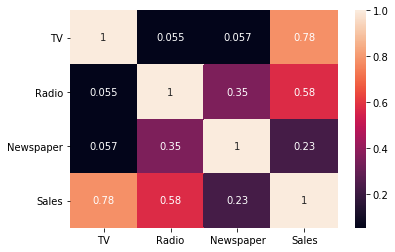

In [12]:
sns.heatmap(df.corr(),annot=True)

In [14]:
import statsmodels.api as sm

In [15]:
cols = list(X)
p_max = 1
while (len(cols)>0):
    p=[]
    X_1= X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = list(model.pvalues.values[1:])
    p = pd.Series(p,index = cols)
    p_max = max(p)
    features_with_p_max = p.idxmax()
    if (p_max>0.05):
        cols.remove(features_with_p_max)
    else:
        break
selected_features = cols

In [16]:
selected_features

['TV', 'Radio']

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [20]:
lin_reg = LinearRegression()

In [21]:
features = RFE(lin_reg,2)

In [22]:
features.fit(X,y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=2, step=1, verbose=0)

In [23]:
features.ranking_

array([1, 1, 2])

In [24]:
cols = list(X)

In [25]:
cols = pd.Series(cols)

In [26]:
cols[features.support_]

0       TV
1    Radio
dtype: object

In [27]:
model=  lin_reg.fit(X,y)

In [28]:
ok = pd.Series(abs(model.coef_), index = cols)
#ok = pd.Series(rfc.feature_importances_, index = list(X)).sort_values(ascending=True).plot(kind = "barh")

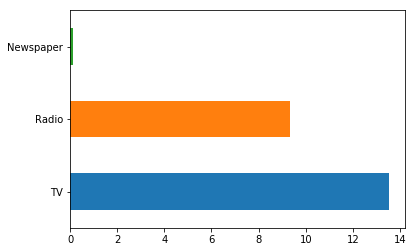

In [32]:
ok.sort_values(ascending=False).plot(kind="barh")


In [ ]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test,y_pred))